# Estimating the quality of wines with regression trees and model trees

## Exploring and preparing the data

In [33]:
# import the data whitewines as wine
wine <- read.csv("whitewines.csv")
str(wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


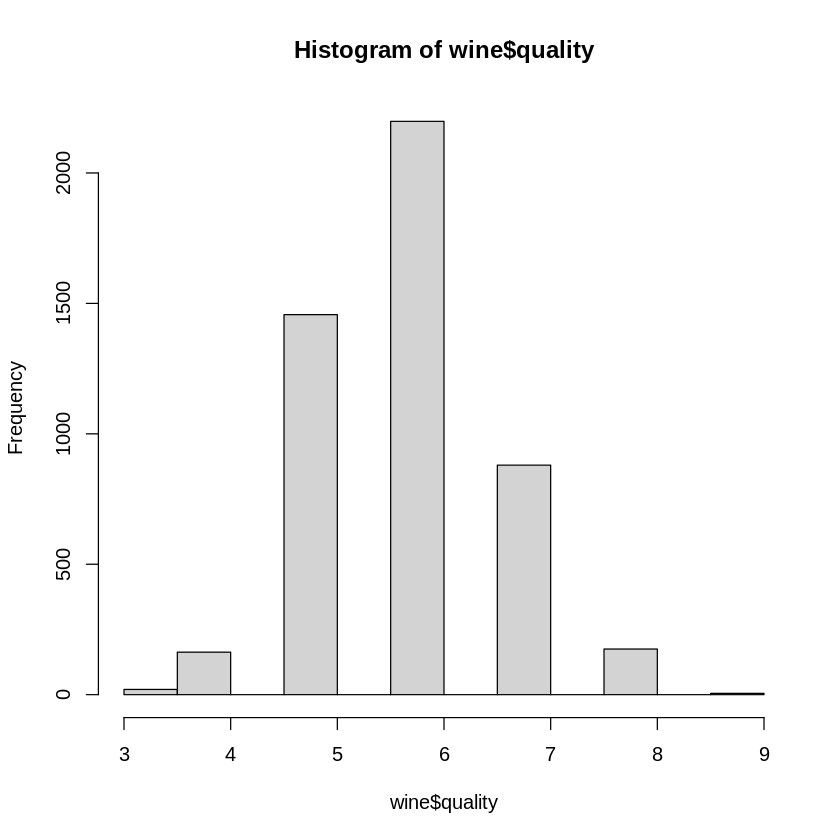

In [2]:
# checking the distribution of wine quality
hist(wine$quality)

The wine quality follows normal distribution

In [34]:
# Dividing the data into training(75%) and test datsets(25%)
wine_train<-wine[1:3750,]
wine_test<-wine[3751:4898,]

## Training the model on the data

In [7]:
# creating the model
# install.packages("rpart") #recursive partitioning
library(rpart)
m.rpart <- rpart(quality ~ ., data = wine_train)
m.rpart

n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 3140.06000 5.886933  
   2) alcohol< 10.85 2473 1510.66200 5.609381  
     4) volatile.acidity>=0.2425 1406  740.15080 5.402560  
       8) volatile.acidity>=0.4225 182   92.99451 4.994505 *
       9) volatile.acidity< 0.4225 1224  612.34560 5.463235 *
     5) volatile.acidity< 0.2425 1067  631.12090 5.881912 *
   3) alcohol>=10.85 1277 1069.95800 6.424432  
     6) free.sulfur.dioxide< 11.5 93   99.18280 5.473118 *
     7) free.sulfur.dioxide>=11.5 1184  879.99920 6.499155  
      14) alcohol< 11.85 611  447.38130 6.296236 *
      15) alcohol>=11.85 573  380.63180 6.715532 *

In [8]:
# a more detailed summary
summary(m.rpart)

Call:
rpart(formula = quality ~ ., data = wine_train)
  n= 3750 

          CP nsplit rel error    xerror       xstd
1 0.17816211      0 1.0000000 1.0007531 0.02388914
2 0.04439109      1 0.8218379 0.8231434 0.02237688
3 0.02890893      2 0.7774468 0.7880542 0.02215367
4 0.01655575      3 0.7485379 0.7596741 0.02100296
5 0.01108600      4 0.7319821 0.7460774 0.02057322
6 0.01000000      5 0.7208961 0.7465717 0.02070497

Variable importance
             alcohol              density            chlorides 
                  38                   23                   12 
    volatile.acidity total.sulfur.dioxide  free.sulfur.dioxide 
                  12                    7                    6 
           sulphates                   pH       residual.sugar 
                   1                    1                    1 

Node number 1: 3750 observations,    complexity param=0.1781621
  mean=5.886933, MSE=0.8373493 
  left son=2 (2473 obs) right son=3 (1277 obs)
  Primary splits:
      alco

## Visualizing Decision Trees

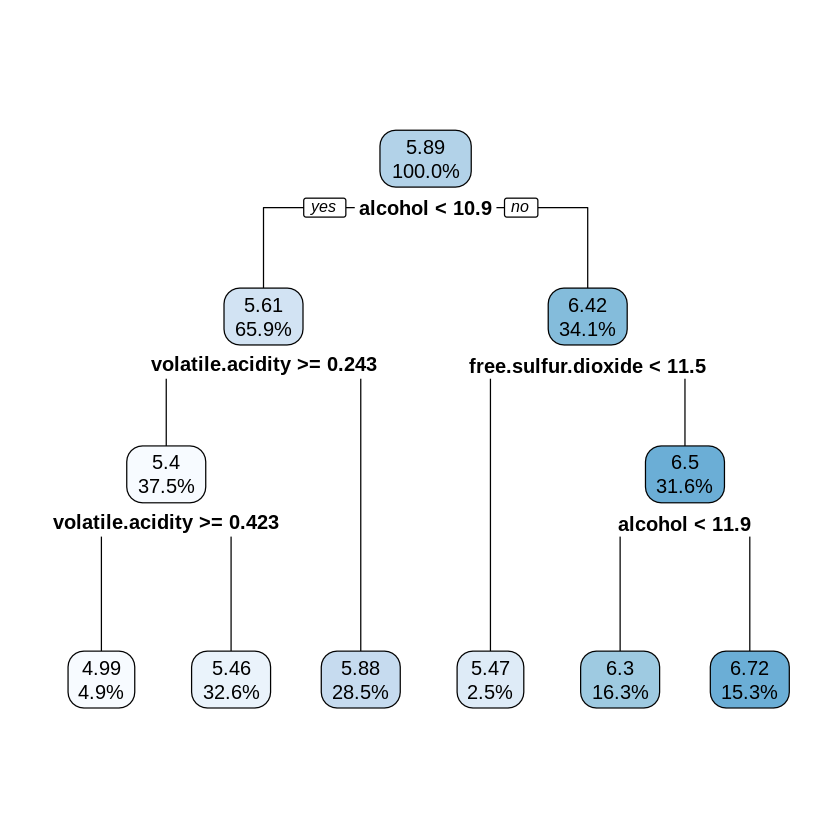

In [11]:
# install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(m.rpart, digits = 3)

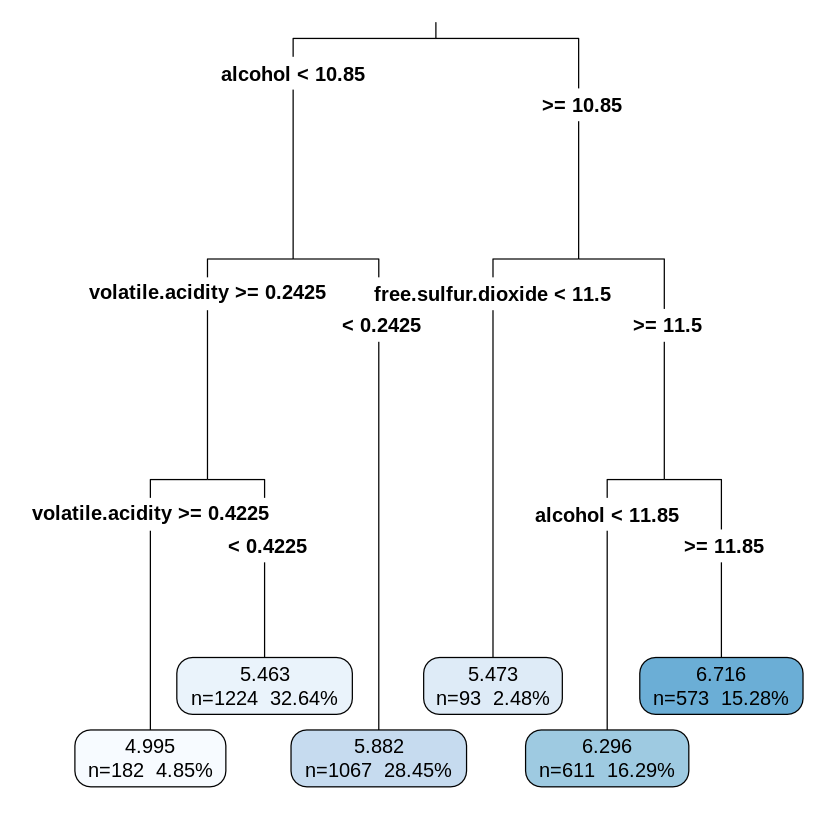

In [12]:
# adding other parameters on the rpart.plot()
rpart.plot(m.rpart, digits = 4, fallen.leaves = TRUE, type = 3, extra = 101)

 The fallen.leaves
parameter forces the leaf nodes to be aligned at the bottom of the plot, while the type
and extra parameters affect the way the decisions and nodes are labeled

## Evaluating model performance

In [14]:
# predicted values
p.rpart <- predict(m.rpart, wine_test)

In [16]:
# summary of the predicted values
summary(p.rpart)
summary(wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.995   5.463   5.882   5.999   6.296   6.716 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.848   6.000   8.000 

This finding suggests that the model is not correctly identifying the extreme cases, in
particular the best and worst wines. On the other hand, between the first and third
quartile, we may be doing well.

In [17]:
# checking the correlation between the predicted and actual values
cor(p.rpart, wine_test$quality)

[1] 0.4931608

0.49 is quite low

## Measuring performance with the Mean Absolute Error

This is to check how far, on
average, its model prediction was from the true value. 

In [18]:
# we create a simple MAE function
MAE <- function(actual, predicted){
  mean(abs(actual - predicted))
}

In [20]:
# The MAE of our predictions is
MAE(wine_test$quality, p.rpart)

[1] 0.5732104

In [21]:
# mean of the wine quality
mean(wine_test$quality)

[1] 5.848432

In [23]:
# The MAE against the actual mean
MAE(5.85, wine_test$quality)

[1] 0.5890244

## Improving the model performance

In [ ]:
# We use the M5' algorithm available in RWeka package
# install.packages("RWeka")
# Fit the model tree
library(RWeka)
m.m5p <- M5P(quality ~ ., data = wine_train)
m.m5p

In [36]:
# summary
summary(m.m5p)


=== Summary ===

Correlation coefficient                 -0.2414
Mean absolute error                    102.3629
Root mean squared error                129.5719
Relative absolute error              14704.2234 %
Root relative squared error          14159.8116 %
Total Number of Instances             3750     

In [37]:
# predicted values on the unseen data
p.m5p <- predict(m.m5p, wine_test)
summary(p.m5p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-539.90 -165.65 -107.07 -112.27  -33.70   32.49 

The prediction is so mad

In [40]:
# correlation
cor(p.m5p, wine_test$quality)

[1] -0.2036594

In [41]:
# MAE
MAE(p.m5p, wine_test$quality)

[1] 118.6835

NB: The model just gave mad values and mad predictions